## What is the most profitable and popluar genre? and the correlation between these two.

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
df = pd.read_csv('Include_Genres_and_Featured_Engineering_Columns.csv')

In [9]:
df.head()

,title,genre_list,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,...,Thriller,War,Western,vote_average,popularity,vote_count,revenue,budget,release_date,profit
0,2067,"ScienceFiction,Thriller,Drama",0,0,0,0,0,0,1,0,...,1,0,0,5.8,3739.463,141,0,0,2020-10-01,0
1,Welcome to Sudden Death,"Action,Drama,Thriller",1,0,0,0,0,0,1,0,...,1,0,0,6.6,2058.684,113,0,0,2020-09-29,0
2,Enola Holmes,"Crime,Drama,Mystery",0,0,0,0,1,0,1,0,...,0,0,0,7.6,1636.807,2123,0,21000000,2020-09-23,-21000000
3,Mulan,"Action,Adventure,Drama,Fantasy",1,1,0,0,0,0,1,0,...,0,0,0,7.3,1168.889,2534,57000000,200000000,2020-09-04,-143000000
4,Hard Kill,"Action,Thriller",1,0,0,0,0,0,0,0,...,1,0,0,4.7,1034.935,141,0,0,2020-08-25,0


In [183]:
(df.iloc[:,2:-7].sum().sort_values(ascending=False))

Drama             1795
Comedy            1450
Thriller          1278
Action            1253
Adventure          918
Crime              682
Romance            675
Horror             595
ScienceFiction     587
Family             561
Fantasy            544
Mystery            394
Animation          323
History            190
War                152
Music              134
Western             62
Documentary         18
TVMovie              2
dtype: int64

In [196]:
labels = ['Drama',
'Comedy',     
'Thriller',          
'Action',            
'Adventure',          
'Crime',              
'Romance',           
'Horror',          
'ScienceFiction',    
'Family',             
'Fantasy',            
'Mystery',            
'Animation',          
'History',            
'War',                
'Music',              
'Western',            
'Documentary', 'TVMovie']
sizes = list((df.iloc[:,2:-7].sum().sort_values(ascending=False)))




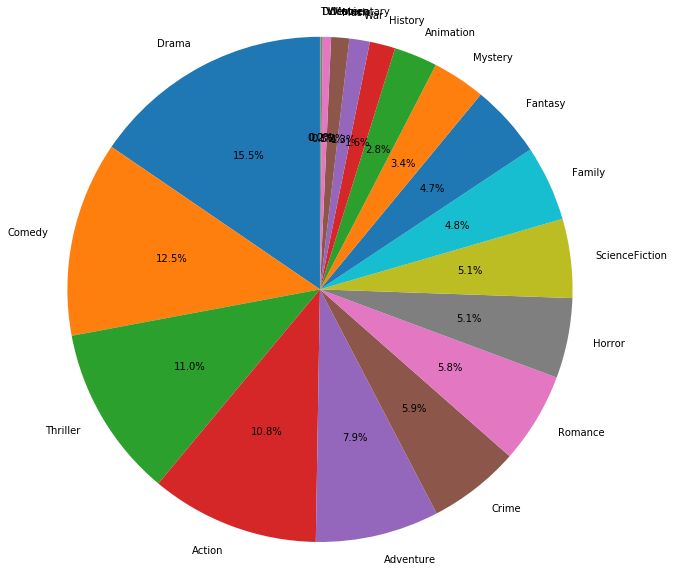

In [195]:
# I know that it seems messy, I just wanted to show that these genres are battling in an uneven field
fig1, ax1 = plt.subplots(figsize=(10,10))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

### what is the most profitable genre? 

In [25]:
#Create a new DF according to our data where the revenue and budget are availabe
df =df.loc[(df['revenue'] != 0) & (df['budget'] != 0)]


In [15]:
df.head()

,title,genre_list,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,...,Thriller,War,Western,vote_average,popularity,vote_count,revenue,budget,release_date,profit
3,Mulan,"Action,Adventure,Drama,Fantasy",1,1,0,0,0,0,1,0,...,0,0,0,7.3,1168.889,2534,57000000,200000000,2020-09-04,-143000000
13,Peninsula,"Action,Horror,Thriller",1,0,0,0,0,0,0,0,...,1,0,0,7.1,733.389,623,35878266,17000000,2020-07-15,18878266
24,Birds of Prey (and the Fantabulous Emancipatio...,"Action,Crime,Comedy",1,0,0,1,1,0,0,0,...,0,0,0,7.2,463.702,6059,201858461,75000000,2020-02-05,126858461
26,Joker,"Crime,Thriller,Drama",0,0,0,0,1,0,1,0,...,1,0,0,8.2,434.909,15195,1074251311,55000000,2019-10-02,1019251311
32,Bad Boys for Life,"Thriller,Action,Crime",1,0,0,0,1,0,0,0,...,1,0,0,7.3,401.306,5408,419074646,90000000,2020-01-15,329074646


In [35]:
# df[df['Drama'] == 1][['revenue','popularity', 'profit' ]].sum()



In [34]:
#Drop duplicated rows regarding title
df['title'].drop_duplicates(inplace=True)

In [48]:
# creating a list of all genres 
genre_keys = list(df.iloc[:,2:-7].columns.values)

In [49]:
genre_keys

['Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'ScienceFiction',
 'TVMovie',
 'Thriller',
 'War',
 'Western']

In [116]:
#Creating a list of summation of each genre in profit


genre_values =[]
for i in dict_keys:
    genre_values.append(int(df.loc[df[i]==1, ['profit']].sum()))

genre_values

[148888438763,
 163854142443,
 56829059862,
 122442263889,
 35834469173,
 746791135,
 103116581508,
 80754389487,
 84608513305,
 8501740911,
 25555797495,
 9834451152,
 22959394522,
 50828484849,
 76970715100,
 1775125,
 77001832681,
 9651534584,
 2457975222]

In [146]:
#create a DF by gathered data
data={'genres' : genre_keys, 'profit': genre_values}
sum_genre_df = pd.DataFrame(data = data).set_index('genres').sort_values(by='profit', ascending=False)
sum_genre_df

,profit
genres,
Adventure,163854142443
Action,148888438763
Comedy,122442263889
Drama,103116581508
Fantasy,84608513305
Family,80754389487
Thriller,77001832681
ScienceFiction,76970715100
Animation,56829059862


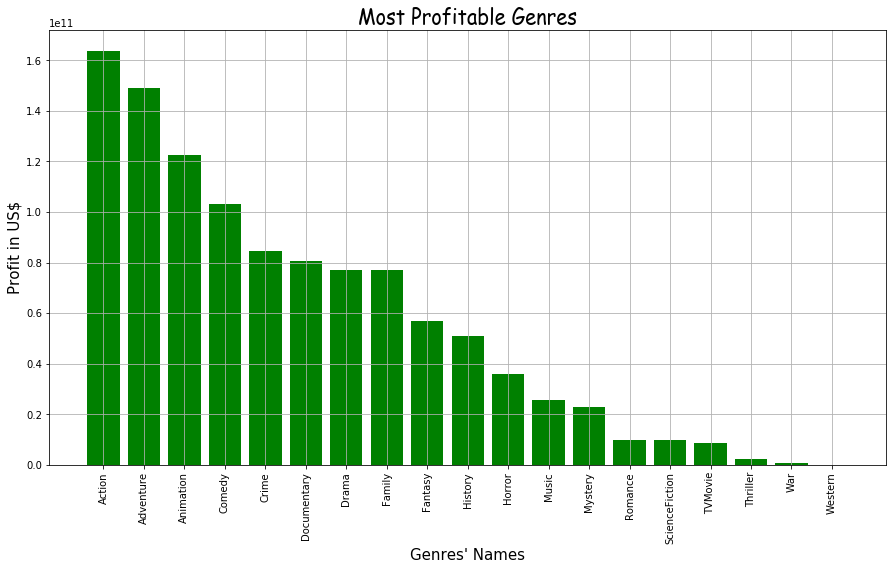

In [171]:
#create a plot..
plt.figure(figsize=(15,8))


x=genre_keys
height= sum_genre_df['profit']


plt.bar(x,height, color='g')
plt.xlabel('Genres\' Names',size=15)
plt.ylabel('Profit in US$', size=15)
plt.title('Most Profitable Genres', fontdict={'fontname':'Comic Sans MS', 'fontsize':20})
plt.xticks(x, rotation='vertical')




plt.grid()
plt.show()

### what is the most popular genre ?

In [111]:
#create a list of summation of popularity in each genre
genre_popularity =[]
for i in dict_keys:
    genre_popularity.append(float(df.loc[df[i]==1, ['popularity']].sum()))
    
genre_popularity

[38516.78,
 31262.097999999998,
 11858.951000000001,
 33443.481,
 14684.728000000001,
 270.05400000000003,
 35809.743,
 17453.156000000003,
 19663.644,
 3548.1459999999997,
 16814.184999999998,
 2746.398,
 8597.019,
 12243.489,
 18855.418999999998,
 54.459,
 29979.051,
 3320.085,
 1044.663]

In [128]:
genre_keys

['Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'ScienceFiction',
 'TVMovie',
 'Thriller',
 'War',
 'Western']

In [148]:

data={'genres' : genre_keys, 'popularity': genre_popularity}
sum_genre_pop_df = pd.DataFrame(data = data).set_index('genres').sort_values(by='popularity', ascending=False)
sum_genre_pop_df

,popularity
genres,
Action,38516.780
Drama,35809.743
Comedy,33443.481
Adventure,31262.098
Thriller,29979.051
Fantasy,19663.644
ScienceFiction,18855.419
Family,17453.156
Horror,16814.185


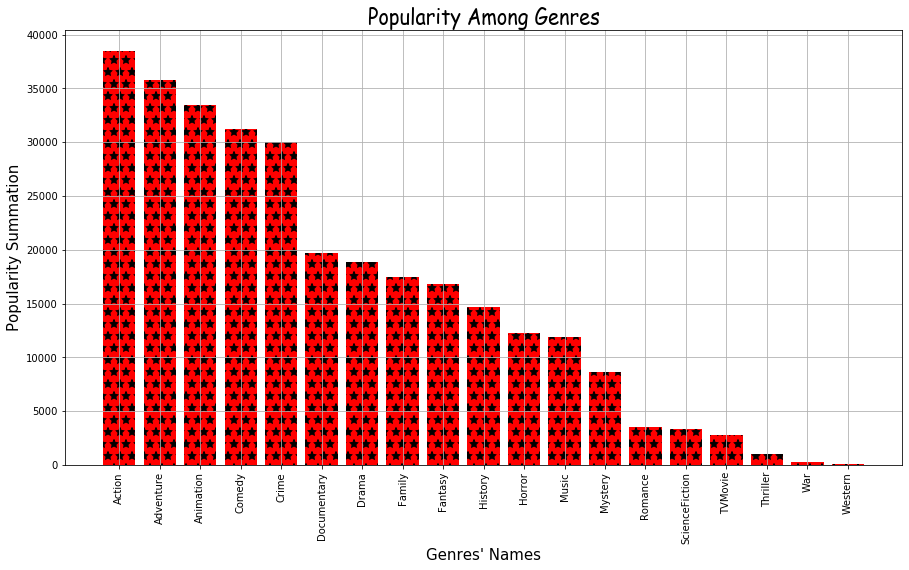

In [164]:
plt.figure(figsize=(15,8))


x=genre_keys
height= sum_genre_pop_df['popularity']


plt.bar(x,height, color='r', hatch='*')


plt.xticks(x, rotation='vertical')
plt.title('Popularity Among Genres', fontdict={'fontname':'Comic Sans MS', 'fontsize':20})
plt.ylabel('Popularity Summation', size=15)
plt.xlabel('Genres\' Names',size=15)




plt.grid()
plt.show()

### The correlation between profit and popularity by visualazing data.

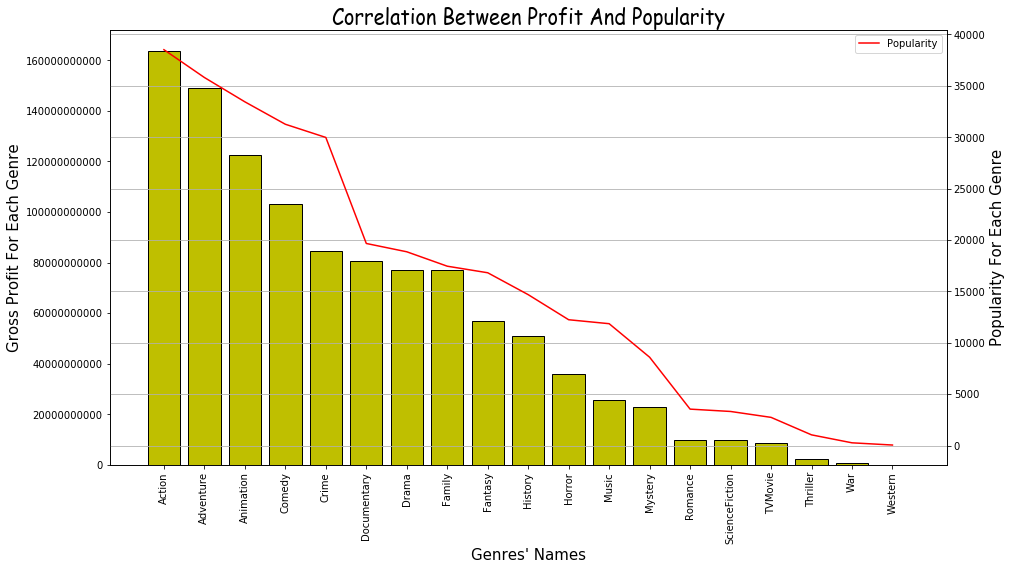

In [175]:
#trying to find the correlation between these two graphs...



genres = genre_keys
profit = sum_genre_df['profit']
popularity = sum_genre_pop_df['popularity']



fig, ax1 = plt.subplots(figsize=(15,8))
ax2 = ax1.twinx()
ax1.bar(genres,profit,color='y',edgecolor='black')
ax2.plot(genres, popularity, 'r-', label= 'Popularity')


plt.title('Correlation Between Profit And Popularity', fontdict={'fontname' : 'Comic Sans MS', 'fontsize': 20})
ax1.set_xlabel('Genres\' Names',size=15)
ax1.set_ylabel('Gross Profit For Each Genre', size = 15)
ax2.set_ylabel('Popularity For Each Genre', size=15)
ax1.set_xticklabels(genres, rotation='vertical')
ax1.get_yaxis().get_major_formatter().set_scientific(False)

plt.grid()
plt.legend()
plt.show()

In [136]:
#create a new 
corr_df = pd.merge(left=sum_genre_df, right=sum_genre_pop_df, left_on='genres', right_on='genres')

In [139]:
#
corr_df.corr()['profit'].sort_values()

popularity    0.925473
profit        1.000000
Name: profit, dtype: float64